# Waldo's Detection


In [56]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## Baby steps

The first step is to detect the face of Waldo sample in the image it has been extracted from. Let's try this inside a smaller version of the original image for the sake of simplicity.

Original image size:  (500, 300)
Pattern image size:  (30, 34)


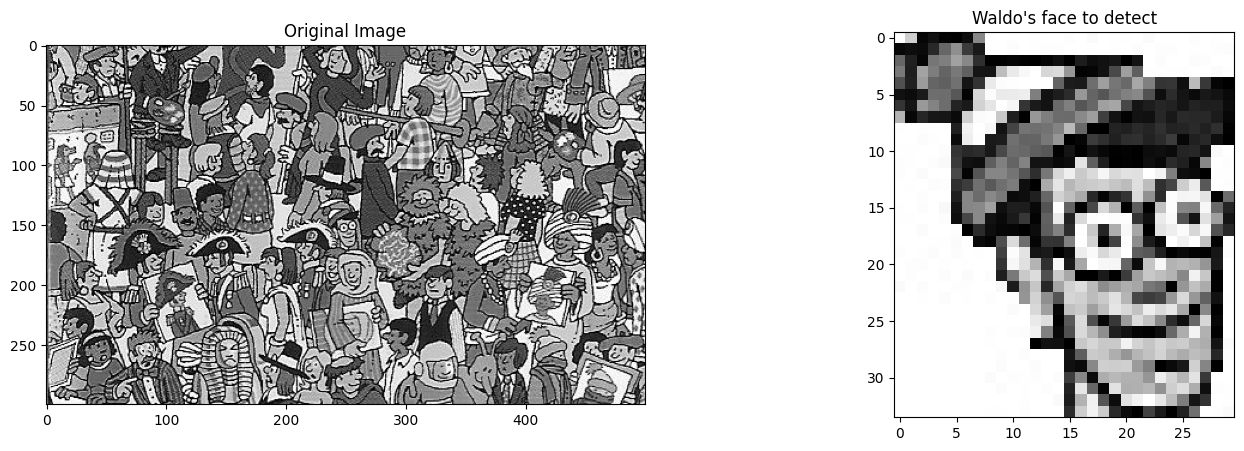

In [57]:
# Load images
ref = Image.open("images/waldo_zoom1.jpg").convert("L")
target = Image.open("images/waldo.jpg").convert("L")

# Print images sizes
print("Original image size: ", ref.size)
print("Pattern image size: ", target.size)

plt.figure(figsize=(17, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(ref, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Waldo's face to detect")
plt.imshow(target, cmap="gray")

### Phase correlation method

The phase correlation method is a technique used to detect the relative shift between two images. It is based on the fact that the phase of the Fourier transform of an image is invariant to translation. The method is based on the following steps:

$\mathcal{Re}[ \mathcal{F}^{-1}_{2D}( \frac{I_{DFT}}{|I_{DFT}|} .* \frac{J_{DFT}}{|J_{DFT}|} ) ]$

Where: 

$I_{DFT} = \mathcal{F}_{1D}(I)$

$J_{DFT} = \mathcal{F}_{1D}(J)$

$\mathcal{F}_{1D}$ is the 1D Fourier transform, $\mathcal{F}^{-1}_{2D}$ is the 2D inverse Fourier transform, $.*$ is the element-wise multiplication and $|I_{DFT}|$ is the magnitude of the 1D Fourier transform.

The result of the phase correlation is a 2D array with a peak at the position of the relative shift between the two images.

In [58]:
def phase_correlation(a, b):
    G_a = np.fft.fft2(a)
    G_b = np.fft.fft2(b)
    G_a /= np.absolute(G_a)
    G_b /= np.absolute(G_b)
    conj_b = np.ma.conjugate(G_b)
    R = G_a*conj_b
    r = np.fft.ifft2(R).real
    return r

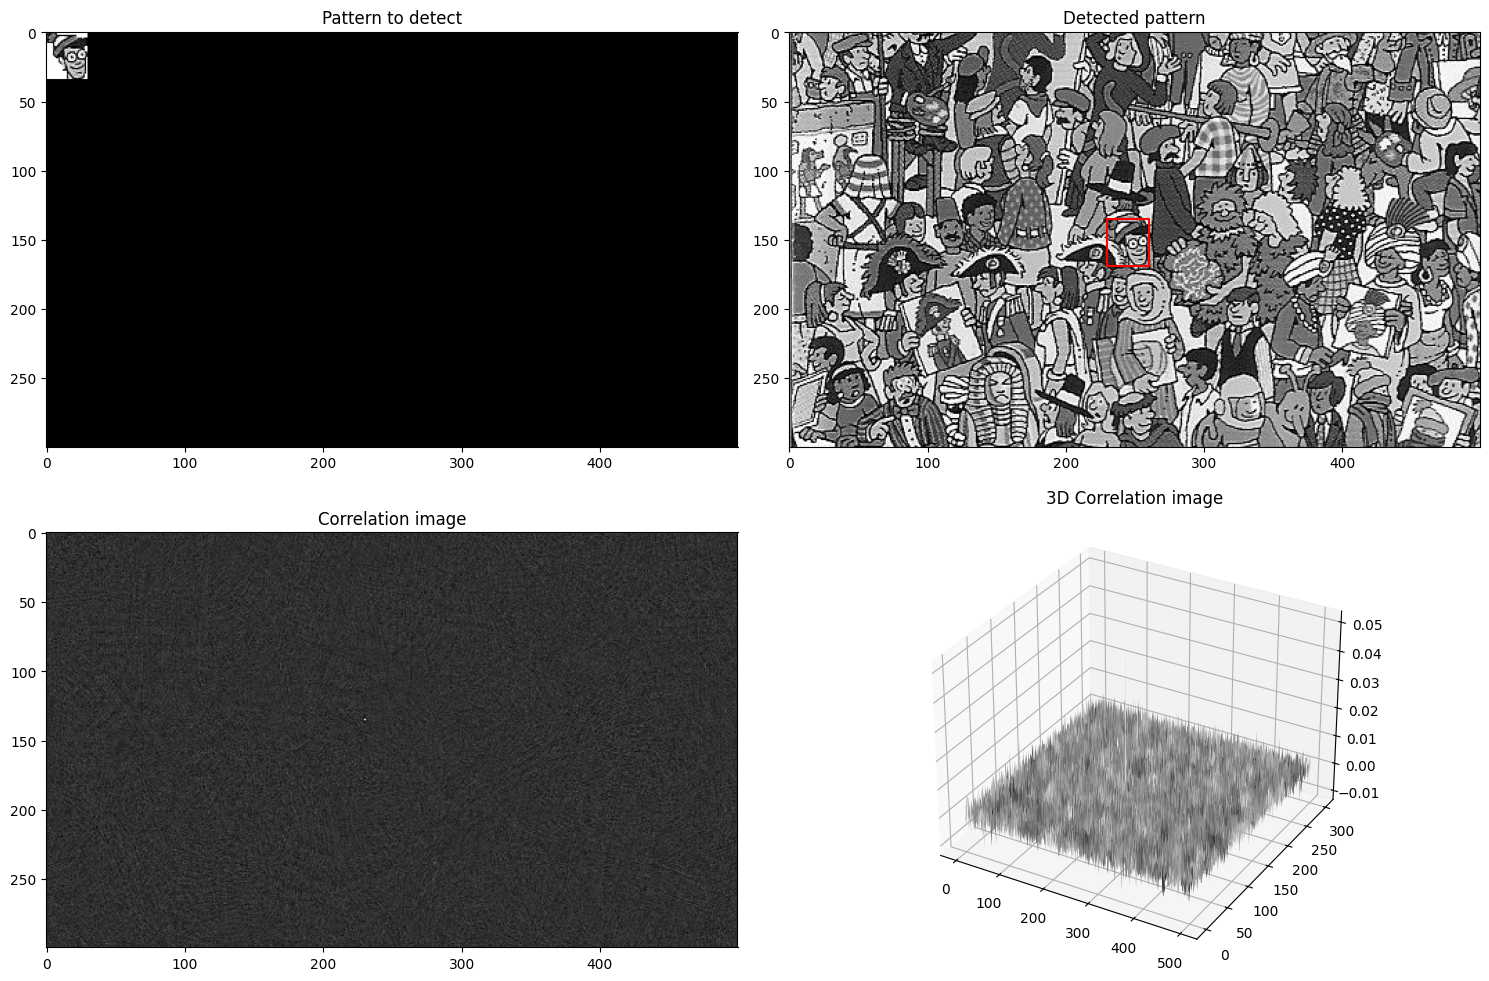

In [59]:
# Create the correlation image of compatible size
target_w, target_h = target.size
pattern = np.zeros_like(ref)
pattern[:target_h, :target_w] = np.array(target)

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4, projection='3d')

# Plotter la première figure
ax1.imshow(pattern, cmap="gray")
ax1.set_title("Pattern to detect")

# Calculer la corrélation de phase
corr = phase_correlation(ref, pattern)
r, c = np.unravel_index(corr.argmax(), corr.shape)

# Square size of the pattern
rect_top_left = (c, r)
rect_bottom_right = (c + target_w, r + target_h)

# Plotter la deuxième figure
ax2.imshow(ref, cmap="gray")
ax2.plot([rect_top_left[0], rect_bottom_right[0], rect_bottom_right[0], rect_top_left[0], rect_top_left[0]], 
         [rect_top_left[1], rect_top_left[1], rect_bottom_right[1], rect_bottom_right[1], rect_top_left[1]], 'r-')
ax2.set_title("Detected pattern")

# Plotter la troisième figure
ax3.imshow(corr, cmap="gray")
ax3.set_title("Correlation image")

# Plotter la quatrième figure en 3D
X, Y = np.meshgrid(range(corr.shape[1]), range(corr.shape[0]))
ax4.plot_surface(X, Y, corr, cmap='gray')
ax4.set_title("3D Correlation image")

# Afficher les graphiques
plt.tight_layout()
plt.show()


Fantastic right ? But to be fair, this is completely normal considering the fact that the image is a crop from the original one. Let's try to detect the face of Waldo from another image.

## A bigger challenge

Let's take another image and try to detect Waldo's face in it.

In [60]:
# Load images
ref2 = Image.open("images/ref2.jpg").convert("L")
target = Image.open("images/waldo.jpg").convert("L")

Original image size:  (500, 300)
Pattern image size:  (30, 34)


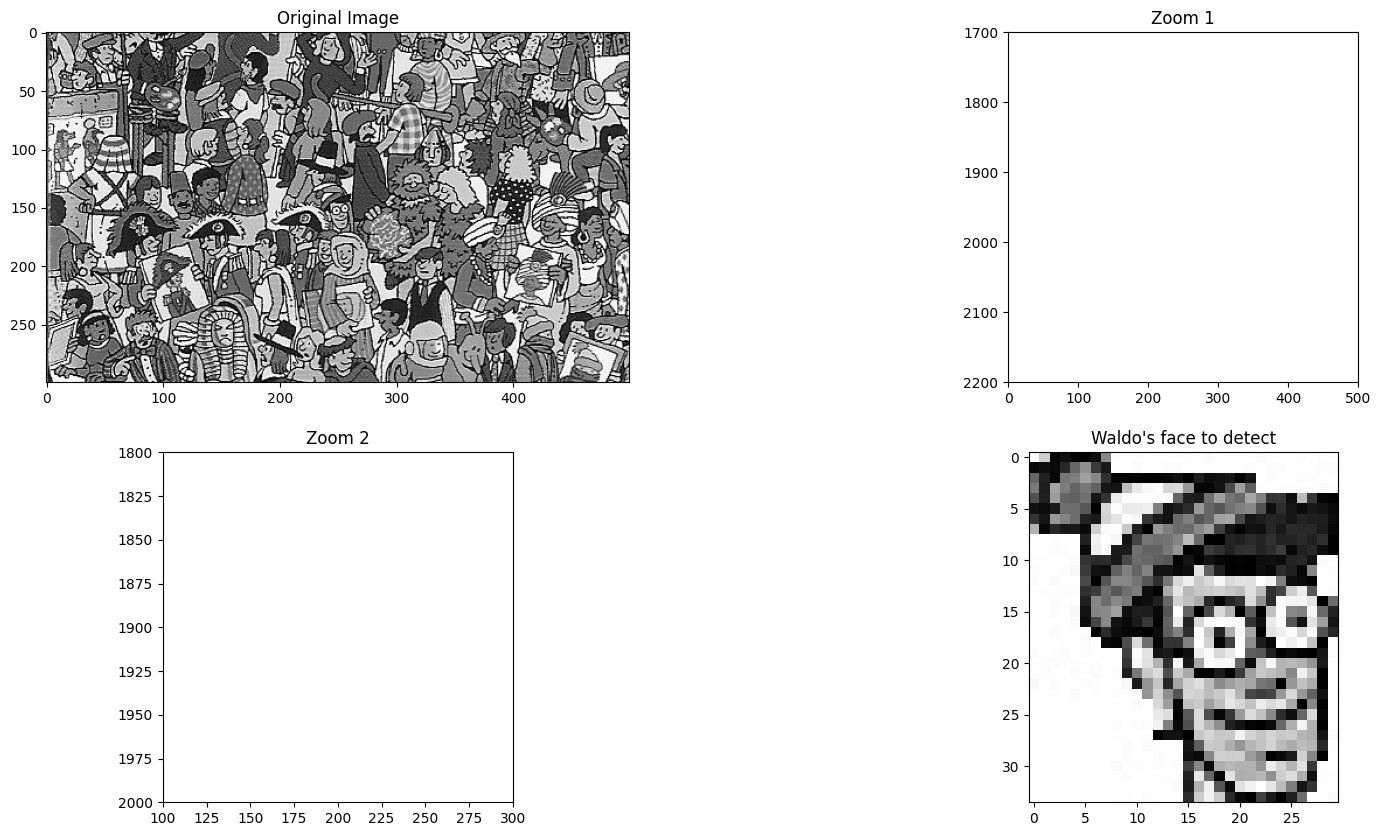

In [61]:


# Print images sizes
print("Original image size: ", ref.size)
print("Pattern image size: ", target.size)

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(ref, cmap="gray")

plt.subplot(2, 2, 2)
plt.title("Zoom 1")
plt.imshow(ref, cmap="gray")
plt.xlim(0, 500)
plt.ylim(2200, 1700)

plt.subplot(2, 2, 3)
plt.title("Zoom 2")
plt.imshow(ref, cmap="gray")
plt.xlim(100, 300)
plt.ylim(2000, 1800)

plt.subplot(2, 2, 4)
plt.title("Waldo's face to detect")
plt.imshow(target, cmap="gray")